<center> 
    <h1>
    Melbourne House Price Prediction Using ML Model
    </h1>
</center>

## Data Description 
 
* `Rooms`: Number of rooms

* `Price`: Price in dollars

* `Method`: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

* `Type`: br - bedroom(s); h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

* `SellerG`: Real Estate Agent

* `Date`: Date sold

* `Distance`: Distance from CBD

* `Regionname`: General Region (West, North West, North, North east …etc)

* `Propertycount`: Number of properties that exist in the suburb.

* `Bedroom2` : Scraped # of Bedrooms (from different source)

* `Bathroom`: Number of Bathrooms

* `Car`: Number of carspots

* `Landsize`: Land Size

* `BuildingArea`: Building Size

* `CouncilArea`: Governing council for the area


In [3]:

import numpy as np 

# data manupulation and processing library, (e.g. pd.read_csv)
import pandas as pd 

from matplotlib import pyplot as plt

import seaborn as sns

from plotly import express as px

# 1. Gathering Data


- Reading the housing information data using read_csv to represent in tabular format 

In [4]:
data = pd.read_csv('melb_data.csv')



- Let's check the shape of our datasets `( number of rows, number of columns/features )`

In [6]:
data.shape

(13580, 21)

# 2. Exploratory Data Analysis



- Let's check the first five rows from data

In [7]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


- Let's check the last five rows from data

In [8]:
data.tail()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0
13579,Yarraville,6 Agnes St,4,h,1285000.0,SP,Village,26/08/2017,6.3,3013.0,...,1.0,1.0,362.0,112.0,1920.0,NaN,-37.81188,144.88449,Western Metropolitan,6543.0


- Let's check the random ten number of data samples, Every time it will print the random five sample of records from original datasets. So we can easly understand the behaviour and what types of data type stored in particular features.

In [9]:
data.sample(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
8183,Oak Park,7 Ridge Rd,4,h,860000.0,PI,Jellis,20/05/2017,11.5,3046.0,...,2.0,2.0,301.0,NaN,NaN,Moreland,-37.71490,144.91530,Northern Metropolitan,2651.0
11028,Footscray,12/26 Park St,2,t,575000.0,SA,Nelson,12/08/2017,5.1,3011.0,...,2.0,1.0,88.0,94.5,2000.0,Maribyrnong,-37.78872,144.88891,Western Metropolitan,7570.0
8076,Maribyrnong,8 Parade Sq,2,t,431000.0,S,Raine,8/04/2017,8.7,3032.0,...,1.0,1.0,0.0,NaN,NaN,Maribyrnong,-37.77220,144.88070,Western Metropolitan,4918.0
2989,Hadfield,1/32 Sutherland St,3,h,545000.0,S,Raine,12/11/2016,12.1,3046.0,...,2.0,3.0,230.0,113.0,2000.0,Moreland,-37.70730,144.94860,Northern Metropolitan,2606.0
3017,Hampton,6 Earlsfield Rd,4,h,2140000.0,S,Hodges,3/12/2016,13.7,3188.0,...,2.0,3.0,688.0,187.0,1925.0,Bayside,-37.93190,145.01730,Southern Metropolitan,5454.0
5024,Preston,67 Regent St,3,h,875000.0,S,Nelson,28/08/2016,8.8,3072.0,...,2.0,1.0,650.0,119.0,1950.0,Darebin,-37.73020,144.99800,Northern Metropolitan,14577.0
1863,Chadstone,2/44 Railway Pde S,3,u,700000.0,S,Bekdon,4/06/2016,13.6,3148.0,...,2.0,1.0,224.0,94.0,2006.0,Monash,-37.87380,145.10540,Southern Metropolitan,3582.0
4762,Port Melbourne,220/99 Dow St,2,u,625000.0,PI,RT,18/06/2016,3.8,3207.0,...,2.0,1.0,2166.0,NaN,NaN,Port Phillip,-37.84150,144.94120,Southern Metropolitan,8648.0
4209,Newport,3 River St,3,h,1210000.0,SP,Williams,6/08/2016,8.4,3015.0,...,1.0,1.0,546.0,144.0,1920.0,Hobsons Bay,-37.84140,144.89200,Western Metropolitan,5498.0
8501,West Footscray,4/624 Barkly St,2,u,490000.0,S,Village,22/04/2017,8.2,3012.0,...,1.0,1.0,117.0,NaN,NaN,Maribyrnong,-37.79680,144.87350,Western Metropolitan,5058.0


### Target Feature

In [10]:

TARGET_FEATURE = 'Price'

Y = data[TARGET_FEATURE]

Y.head()

0    1480000.0
1    1035000.0
2    1465000.0
3     850000.0
4    1600000.0
Name: Price, dtype: float64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

As we can see in the output.

1. There are **13580 entries**
1. There are total **21 features (0 to 20)**
1. There are three types of datatype dtypes: **float64(12), int64(1), object(8)**
1. It's Memory usage that is, memory usage: **2.2+ MB**
1. Also, We can check how many missing values available in the **Non-Null Count** column

In [12]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Here,`describe()` method provides us the complete calculations details about the dataset. i.e. let's take the `price` feature for example. It shows the what's the `min`, `max`, `mean(average)` and `std(standard deviation)` of price feature.

In [13]:
data.Price.describe([.2, .4, .6, .8])

count    1.358000e+04
mean     1.075684e+06
std      6.393107e+05
min      8.500000e+04
20%      6.000000e+05
40%      8.000000e+05
50%      9.030000e+05
60%      1.040000e+06
80%      1.450000e+06
max      9.000000e+06
Name: Price, dtype: float64

### Numerical Features

In [14]:
numeric_features = data.select_dtypes(['int', 'float']).columns

numeric_features , len(numeric_features)

(Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
        'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
        'Propertycount'],
       dtype='object'),
 13)

### Categorical Features

In [15]:
categorical_features = data.select_dtypes('object').columns

categorical_features, len(categorical_features)

(Index(['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea',
        'Regionname'],
       dtype='object'),
 8)

### Find the Missing Values

Here, We need to find how many missing values are there in our datasets.

In [16]:
data.isna().sum().sort_values(ascending=False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Suburb              0
Bathroom            0
Regionname          0
Longtitude          0
Lattitude           0
Landsize            0
Bedroom2            0
Address             0
Postcode            0
Distance            0
Date                0
SellerG             0
Method              0
Price               0
Type                0
Rooms               0
Propertycount       0
dtype: int64

Here, We convert the number of missing values into percentages. So, we can easly understand to how many percentage of missing values available.

In [17]:
(data.isna().sum() * 100 / data.isna().count()).sort_values(ascending=False)

BuildingArea     47.496318
YearBuilt        39.580265
CouncilArea      10.081001
Car               0.456554
Suburb            0.000000
Bathroom          0.000000
Regionname        0.000000
Longtitude        0.000000
Lattitude         0.000000
Landsize          0.000000
Bedroom2          0.000000
Address           0.000000
Postcode          0.000000
Distance          0.000000
Date              0.000000
SellerG           0.000000
Method            0.000000
Price             0.000000
Type              0.000000
Rooms             0.000000
Propertycount     0.000000
dtype: float64

- In abouve output, We can clearly see that, There are only four feature `'BuildingArea', 'YearBuilt', 'CouncilArea'` and `'Car'` has null values. So we have to fill some statastical values.

### Filling Missing Values

In [18]:
data[['BuildingArea', 'YearBuilt', 'CouncilArea', 'Car']].describe(include='all')

,BuildingArea,YearBuilt,CouncilArea,Car
count,7130.000000,8205.000000,12211,13518.000000
unique,NaN,NaN,33,NaN
top,NaN,NaN,Moreland,NaN
freq,NaN,NaN,1163,NaN
mean,151.967650,1964.684217,NaN,1.610075
std,541.014538,37.273762,NaN,0.962634
min,0.000000,1196.000000,NaN,0.000000
25%,93.000000,1940.000000,NaN,1.000000
50%,126.000000,1970.000000,NaN,2.000000
75%,174.000000,1999.000000,NaN,2.000000


- As we can see There is one feature have categorical values and rest are numerical features.


In [19]:
# Let's check how many percentage values are NaN.

data.BuildingArea.value_counts(normalize=True, dropna=False) * 100

BuildingArea
NaN       47.496318
120.00     0.839470
110.00     0.655376
100.00     0.648012
130.00     0.618557
            ...    
255.79     0.007364
424.00     0.007364
186.36     0.007364
147.20     0.007364
368.00     0.007364
Name: proportion, Length: 603, dtype: float64

In [20]:
# Check the numerical feature's statastical values.

data.BuildingArea.describe()

count     7130.000000
mean       151.967650
std        541.014538
min          0.000000
25%         93.000000
50%        126.000000
75%        174.000000
max      44515.000000
Name: BuildingArea, dtype: float64

- For Categorical feature, We fill the highest occorance value. In this case, highest occurrence value is `'Moreland'`. so we fill with this values. And other feature are fill with `mean(), median(),` and `mode()`.

In [21]:
data['CouncilArea'] = data['CouncilArea'].fillna('Moreland')

In [22]:
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].mode()[0])

In [23]:
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].mean())

In [24]:
data['Car'] = data['Car'].fillna(data['Car'].median())

In [25]:
# Now, is there any missing values are there?
data.isna().any()

Suburb           False
Address          False
Rooms            False
Type             False
Price            False
Method           False
SellerG          False
Date             False
Distance         False
Postcode         False
Bedroom2         False
Bathroom         False
Car              False
Landsize         False
BuildingArea     False
YearBuilt        False
CouncilArea      False
Lattitude        False
Longtitude       False
Regionname       False
Propertycount    False
dtype: bool

#### Categorical Features

In [26]:
print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 13580
Total Unique Records of Suburb = 314
Total Unique Records of Address = 13378
Total Unique Records of Type = 3
Total Unique Records of Method = 5
Total Unique Records of SellerG = 268
Total Unique Records of Date = 58
Total Unique Records of CouncilArea = 33
Total Unique Records of Regionname = 8


###### Removing columns which has huge number of unique values

In [27]:
categorical_features = categorical_features.drop('Address')
categorical_features = categorical_features.drop('SellerG')
categorical_features = categorical_features.drop('Suburb')


In [28]:
# Let's see again the number of unique records

print("Total Records :", len(data) )

for col in categorical_features:
    print("Total Unique Records of "+ col + " =",  len(data[col].unique()))

Total Records : 13580
Total Unique Records of Type = 3
Total Unique Records of Method = 5
Total Unique Records of Date = 58
Total Unique Records of CouncilArea = 33
Total Unique Records of Regionname = 8


# 3. Data Visualizations


In [29]:
data.sample(4)


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
6298,Thornbury,314A Gillies St,2,h,874000.0,S,Love,19/11/2016,6.5,3071.0,...,1.0,2.0,333.0,2.00000,1985.0,Darebin,-37.7642,145.0192,Northern Metropolitan,8870.0
3564,Kensington,28 Pridham St,5,h,1001000.0,S,Rendina,24/09/2016,4.2,3031.0,...,1.0,0.0,301.0,151.96765,1970.0,Melbourne,-37.7896,144.9307,Northern Metropolitan,5263.0
4613,Pascoe Vale,2/2 Bellevue Tce,2,u,495000.0,SP,Brad,7/05/2016,9.9,3044.0,...,1.0,2.0,205.0,151.96765,1970.0,Moreland,-37.7317,144.9313,Northern Metropolitan,7485.0
4469,Northcote,8 Reid St,2,h,1095000.0,S,Ray,22/08/2016,5.5,3070.0,...,1.0,2.0,306.0,86.00000,1910.0,Darebin,-37.7644,145.0040,Northern Metropolitan,11364.0


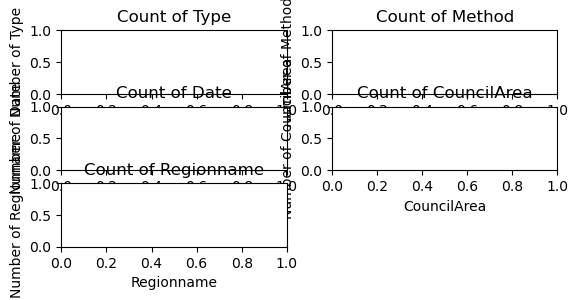

In [32]:
# plt.figure(figsize=(10, 5))

# [ 'Regionname', 'Method', 'Method', 'Type' ]
for idx, column in enumerate(categorical_features):
    
    df = data.copy()
    
    unique = df[column].value_counts(); # ascending=True
 
    plt.subplot(len(categorical_features), 2, idx+1)    
    
    fig = px.bar(x=unique.index, y=unique.values)
    fig.show()
    
    plt.title("Count of "+ column)
#     plt.bar(unique.index, unique.values);
    
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)
    
# plt.tight_layout()
plt.show()   

In [33]:
fig = px.histogram(data, x='Method', y='Price', color='Method');
fig.show()

In [34]:
fig = px.histogram(data, x='Rooms', y='Price', color='Rooms');
fig.show()

In [35]:
corr_ = data[numeric_features].corr()
corr_

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Rooms,1.000000,0.496634,0.294203,0.055303,0.944190,0.592934,0.406935,0.025678,0.091373,-0.051562,0.015948,0.100771,-0.081530
Price,0.496634,1.000000,-0.162522,0.107867,0.475951,0.467038,0.239109,0.037507,0.069570,-0.259387,-0.212934,0.203656,-0.042153
Distance,0.294203,-0.162522,1.000000,0.431514,0.295927,0.127155,0.260596,0.025004,0.073990,0.194815,-0.130723,0.239425,-0.054910
Postcode,0.055303,0.107867,0.431514,1.000000,0.060584,0.113664,0.050514,0.024558,0.040714,0.025400,-0.406104,0.445357,0.062304
Bedroom2,0.944190,0.475951,0.295927,0.060584,1.000000,0.584685,0.403867,0.025646,0.089102,-0.041331,0.015925,0.102238,-0.081350
Bathroom,0.592934,0.467038,0.127155,0.113664,0.584685,1.000000,0.321014,0.037130,0.084462,0.113957,-0.070594,0.118971,-0.052201
Car,0.406935,0.239109,0.260596,0.050514,0.403867,0.321014,1.000000,0.026780,0.068276,0.078696,-0.002023,0.062929,-0.024344
Landsize,0.025678,0.037507,0.025004,0.024558,0.025646,0.037130,0.026780,1.000000,0.094659,0.008806,0.009695,0.010833,-0.006854
BuildingArea,0.091373,0.069570,0.073990,0.040714,0.089102,0.084462,0.068276,0.094659,1.000000,0.005178,0.031799,-0.017441,-0.020736
YearBuilt,-0.051562,-0.259387,0.194815,0.025400,-0.041331,0.113957,0.078696,0.008806,0.005178,1.000000,0.046718,-0.000515,0.004421


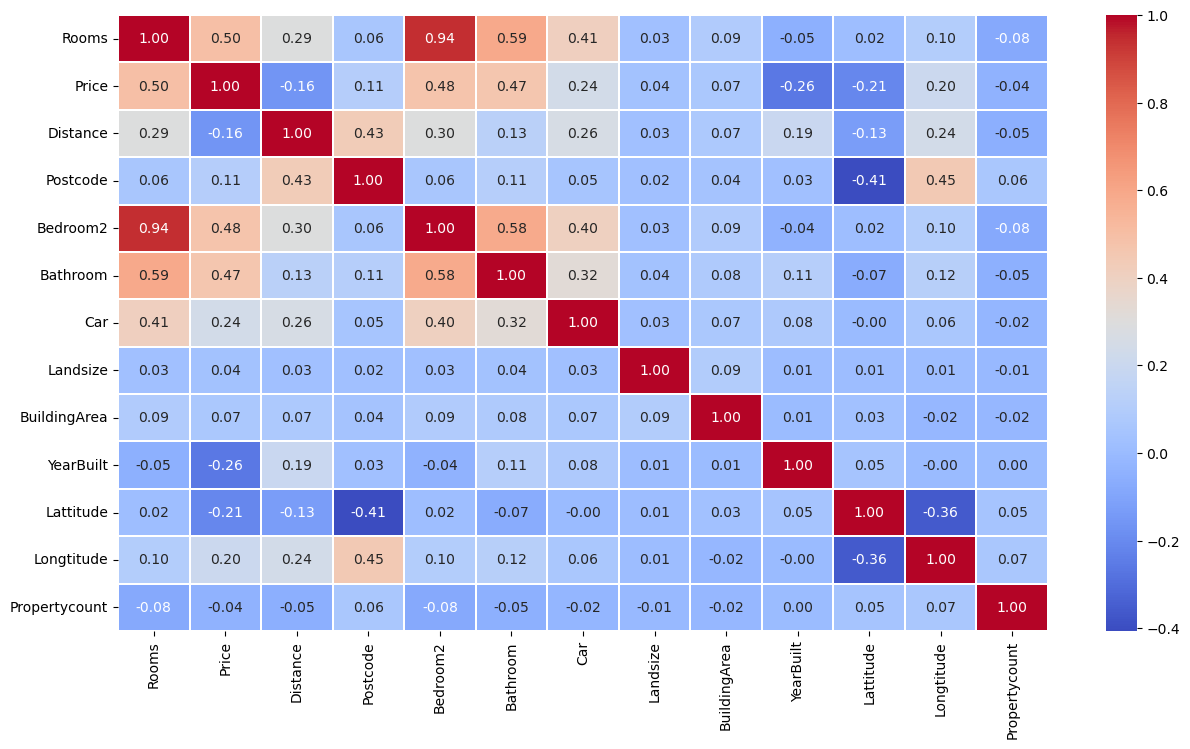

In [36]:
plt.figure(figsize=(15, 8))


sns.heatmap(corr_, fmt='.2f', linewidths=.1, annot=True, cmap='coolwarm')
plt.show()

## Feature Selection


- Here, We need to convert categorical values to numerical values

In [37]:
data[categorical_features].value_counts()

Type  Method  Date        CouncilArea   Regionname                
h     S       23/09/2017  Moreland      Western Metropolitan          43
              3/09/2017   Moreland      Northern Metropolitan         40
              23/09/2017  Moreland      Northern Metropolitan         39
              16/09/2017  Moreland      Northern Metropolitan         38
              19/08/2017  Moreland      Northern Metropolitan         36
                                                                      ..
      VB      29/07/2017  Frankston     South-Eastern Metropolitan     1
                          Hobsons Bay   Western Metropolitan           1
                          Kingston      South-Eastern Metropolitan     1
                          Knox          Eastern Metropolitan           1
u     VB      8/10/2016   Port Phillip  Southern Metropolitan          1
Name: count, Length: 5229, dtype: int64

- Implementing `LabelEncoder` to convert categorical values to numerical values.

In [38]:
#  Import LabelEncoder from sklearn.preproccessing module

In [38]:
from sklearn.preprocessing import LabelEncoder

In [39]:
# Here we need to define feature_columns the we convert to number in the below cell

categorical_features = [ 'Type', 'Method', 'CouncilArea', 'Regionname']
categorical_features

['Type', 'Method', 'CouncilArea', 'Regionname']

In [40]:
# Encoding ...

for column in categorical_features:
    
    l_encoder = LabelEncoder()
    
    data[column] = l_encoder.fit_transform(data[column])
    

- Creating Training Feature to train the model to predict the beter accuracy.

In [41]:

# training_features = ['Rooms', 'Bathroom', 'Landsize', 'BuildingArea', 
#                         'YearBuilt', 'Lattitude', 'Longtitude']

training_features = list(numeric_features) + list(categorical_features)

# Remove 'Price' Feature from list
training_features.remove('Price')

# show the final list
training_features

['Rooms',
 'Distance',
 'Postcode',
 'Bedroom2',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'YearBuilt',
 'Lattitude',
 'Longtitude',
 'Propertycount',
 'Type',
 'Method',
 'CouncilArea',
 'Regionname']

### Scalling Dataset

- Here, We are using `MinMaxScaler` to notmalize our dataset. Firstly, we need to import that class from `sklearn.preprocessing` package

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
# Let's Normalize the data for training and testing

minMaxNorm = MinMaxScaler()

minMaxNorm.fit(data[training_features])



MinMaxScaler()

Create `X` data and assignning from `training feature` columns from `data` and make it normalized.

In [44]:
X = minMaxNorm.transform(data[training_features]) 

In [45]:
X

array([[0.11111111, 0.05197505, 0.06857728, ..., 0.25      , 0.96875   ,
        0.28571429],
       [0.11111111, 0.05197505, 0.06857728, ..., 0.25      , 0.96875   ,
        0.28571429],
       [0.22222222, 0.05197505, 0.06857728, ..., 0.75      , 0.96875   ,
        0.28571429],
       ...,
       [0.22222222, 0.14137214, 0.01637666, ..., 0.25      , 0.71875   ,
        0.85714286],
       [0.33333333, 0.14137214, 0.01637666, ..., 0.        , 0.71875   ,
        0.85714286],
       [0.33333333, 0.13097713, 0.01330604, ..., 0.75      , 0.71875   ,
        0.85714286]])

In [46]:
Y = data['Price']  
Y

0        1480000.0
1        1035000.0
2        1465000.0
3         850000.0
4        1600000.0
           ...    
13575    1245000.0
13576    1031000.0
13577    1170000.0
13578    2500000.0
13579    1285000.0
Name: Price, Length: 13580, dtype: float64

## Splite Train and Test Dataset

Before we splite the data, We need to import train_test_split module from sklearn package

In [47]:
from sklearn.model_selection import train_test_split

### Splites the main data

- split data into training and validation data, for both features and target. The split is based on a random number generator.
- Supplying a numeric value to the random_state argument guarantees we get the same split eve run this script.

In [48]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state = 0)

##### Check the train and test sized

In [49]:
print("Total size: ", data.shape[0])
print("Train size: ", train_X.shape, train_Y.shape)
print("Test size: ", test_X.shape, test_Y.shape)

Total size:  13580
Train size:  (10185, 16) (10185,)
Test size:  (3395, 16) (3395,)


# Model Building

#### Before Implementing ML Models we can create dataframe to stores the prediction values by each models that we are implementing below here.

In [75]:
models_summary = pd.DataFrame([],
                              columns=['model_name', 
                                       'prediction_score',
                                       'mean_absolute_error'
                                      ])
models_summary

,model_name,prediction_score,mean_absolute_error


### Linear Reression Model

In [51]:
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_absolute_error

In [52]:
lr_model = LinearRegression()

lr_model.fit(train_X, train_Y)

LinearRegression()

In [53]:
lr_model_predicted = lr_model.predict(test_X)
lr_model_predicted

array([1680917.33895576, 1046410.66321235,  739798.7252487 , ...,
        914404.29016366,  748075.86588417,  934215.23250777])

In [54]:
lr_model_score = lr_model.score(test_X, test_Y )

lr_model_score

0.5599986342693357

Now, Let's find the `mean absolute error` using test_Y and predicted vales

In [55]:
mae = mean_absolute_error(test_Y, lr_model_predicted)

###### Store model and it's predictoin score in dataframe that we created below the model building section

Now, let's see the model_summary dataframe

In [57]:
models_summary

,model_name,prediction_score,mean_absolute_error


### Decision Tree Regressor Model

In [58]:
from sklearn.tree import DecisionTreeRegressor

In [59]:
Dtree_model = DecisionTreeRegressor(random_state=1)

In [60]:
Dtree_model.fit(train_X, train_Y)

DecisionTreeRegressor(random_state=1)

In [61]:
Dtree_model_predicted = Dtree_model.predict(test_X)

In [62]:
Dtree_model_score = Dtree_model.score(test_X, test_Y)
Dtree_model_score

0.5797746566535157

In [63]:
mae = mean_absolute_error(Dtree_model_predicted, test_Y)


### Random Forest Regressor Model

Here, We implement other models from ensemble package.

In [65]:
from sklearn.ensemble import  RandomForestRegressor


In [66]:
RFRModel = RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [67]:
RFRModel.fit(train_X, train_Y)

RandomForestRegressor(max_leaf_nodes=100, random_state=1)

In [68]:
RFRModel_predicted = RFRModel.predict(test_X)

In [69]:
RFRModel_score = RFRModel.score(test_X, test_Y)
RFRModel_score

0.734913453241187

In [74]:
mae = mean_absolute_error(RFRModel_predicted, test_Y)
mae

201100.04760455663